# Post-process of constraining: parameters

Output image files
- Range plot: selected parameters `range_parms_selected`
- 2-D density plot: q2x vs lamg `dist_q2x-lamg`

In [1]:
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from netCDF4 import Dataset
import matplotlib as mpl

In [2]:
# mce is available in https://github.com/tsutsui1872/mce 
sys.path.append('../mce')

In [3]:
from src.plot import MyPlot # depends on mce module

## Read results

### Calibrated parameters

Output of 020_calibration.ipynb

In [4]:
df_parms_calib = (
    pd.read_csv('./dataout/parms_calib.csv', index_col=[0, 1])
    .unstack(0)
)
df_parms_calib

q4x                         lamg                    \
Method                ar6    mce-2l      s21       ar6    mce-2l     s21   
Dataset                                                                    
ACCESS-CM2       7.733057  6.878696   7.6581  0.699488  0.739969  0.6877   
ACCESS-ESM1-5    6.745166  5.800981   6.9731  0.712660  0.762439  0.7214   
AWI-CM-1-1-MR    8.168461  7.292392   8.4080  1.209335  1.160470  1.2981   
BCC-CSM2-MR      7.217011  5.994669   6.8870  1.143931  0.979157  1.0601   
BCC-ESM1         6.488241  6.022407   6.6794  0.892194  0.923221  0.9350   
CAMS-CSM1-0      9.076223  7.973425   8.8829  1.917556  1.732842  1.8751   
CAS-ESM2-0            NaN       NaN   7.1346       NaN       NaN  0.9282   
CESM2            8.478362  6.487284   8.8426  0.658886  0.628114  0.7186   
CESM2-FV2        7.707721  5.681416   7.9362  0.581514  0.552648  0.5592   
CESM2-WACCM      7.856972  6.671135   8.2798  0.705814  0.713901  0.7344   
CESM2-WACCM-FV2  7.011729  5.748016   7.1276  0.601681  0.591878  0.5936   
CIESM                 NaN  7.963521   8.9425       NaN  0.718404  0.7152   
CMCC-CM2-SR5          NaN  7.310179      NaN       NaN  1.020552     NaN   
CNRM-CM6-1       7.305305  7.326335   7.5059  0.751222  0.748430  0.7697   
CNRM-CM6-1-HR    7.523272  7.708433   7.5314  0.940570  0.880724  0.9427   
CNRM-ESM2-1      5.797400  5.990201   5.7027  0.633740  0.622978  0.6321   
CanESM5          7.467506  7.283649   7.6149  0.646137  0.646104  0.6585   
E3SM-1-0         7.396112  6.672910   7.4155  0.629308  0.635473  0.6381   
EC-Earth3             NaN  6.354394   7.3660       NaN  0.748208  0.8228   
EC-Earth3-Veg         NaN  7.032024   7.8140       NaN  0.831575  0.8550   
FGOALS-f3-L      9.840465  7.928825   9.5356  1.501479  1.301692  1.4323   
FGOALS-g3        7.972359  6.919027   7.8715  1.283779  1.200461  1.2821   
GFDL-CM4         7.658726  6.575151   8.4511  0.822550  0.854816  0.8888   
GFDL-ESM4        7.450284  7.246687   7.3355  1.460192  1.350569  1.2741   
GISS-E2-1-G      8.292052  7.149193   8.1084  1.499887  1.263636  1.4609   
GISS-E2-1-H      7.300777  6.770699   7.5798  1.140782  1.069897  1.1675   
GISS-E2-2-G      7.192669  6.455291   7.2482  1.642447  1.264336  1.6284   
HadGEM3-GC31-LL  7.370973  7.193884   7.4570  0.624395  0.662558  0.6236   
HadGEM3-GC31-MM  7.103402  7.213582   7.3703  0.652831  0.669369  0.6665   
IITM-ESM         9.436749  8.626054   9.2478  1.942847  1.798402  1.9323   
INM-CM4-8             NaN  5.350834   6.2508       NaN  1.458254  1.6883   
INM-CM5-0        6.377653       NaN   6.3507  1.613558       NaN  1.5876   
IPSL-CM6A-LR     7.812110  6.876271   7.5224  0.691037  0.758461  0.7635   
MCM-UA-1-0            NaN       NaN   7.1164       NaN       NaN  1.0436   
MIROC-ES2L       8.167849  7.306803   7.9782  1.557887  1.300439  1.5379   
MIROC6           7.884622  6.768413   7.7304  1.423914  1.252740  1.3612   
MPI-ESM1-2-HR    8.183147  7.398389   8.6334  1.271267  1.250437  1.3359   
MPI-ESM1-2-LR         NaN  8.385191   9.2784       NaN  1.384468  1.4608   
MRI-ESM2-0       8.295757  6.696558   8.0336  1.200057  1.048738  1.2023   
NESM3                 NaN  8.260280   7.7214       NaN  0.902402  0.8349   
NorCPM1               NaN  6.848051      NaN       NaN  1.147503     NaN   
NorESM2-LM       9.532072  6.615321  10.2131  0.926445  1.276142  1.7696   
NorESM2-MM       8.902345  7.072782   9.3908  1.543341  1.389735  1.6922   
SAM0-UNICON      8.046759  7.255909   8.6945  1.033618  0.943384  1.1351   
TaiESM1               NaN  7.272367   8.5134       NaN  0.811419  0.9165   
UKESM1-0-LL      7.476424  7.299849   7.6100  0.663284  0.687853  0.6826   

                      cdeep                             cmix  ...       q2x  \
Method                  ar6      mce-2l       s21        ar6  ...       s21   
Dataset                                                       ...             
ACCESS-CM2        93.230040   71.639335   97.4564   8.705751

In [5]:
# Add ar6_orig that is identical to ar6 for calibration
df_parms_calib = pd.concat([
    df_parms_calib,
    df_parms_calib
    .groupby(level=1, axis=1)
    .get_group('ar6')
    .rename({'ar6': 'ar6_orig'}, level=1, axis=1),
], axis=1).sort_index(axis=1)
df_parms_calib

a0                                      a1            \
Method                ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig   
Dataset                                                                       
ACCESS-CM2       0.445999  0.445999  0.492697  0.449875  0.554001  0.554001   
ACCESS-ESM1-5    0.402246  0.402246  0.473682  0.395783  0.597754  0.597754   
AWI-CM-1-1-MR    0.620322  0.620322  0.619379  0.651998  0.379678  0.379678   
BCC-CSM2-MR      0.483884  0.483884  0.550478  0.536834  0.516116  0.516116   
BCC-ESM1         0.537132  0.537132  0.545536  0.531130  0.462868  0.462868   
CAMS-CSM1-0      0.745168  0.745168  0.700195  0.712222  0.254832  0.254832   
CAS-ESM2-0            NaN       NaN       NaN  0.576359       NaN       NaN   
CESM2            0.339413  0.339413  0.411640  0.374983  0.660587  0.660587   
CESM2-FV2        0.303194  0.303194  0.382600  0.282316  0.696806  0.696806   
CESM2-WACCM      0.380630  0.380630  0.440988  0.368990  0.619370  0.619370   
CESM2-WACCM-FV2  0.348356  0.348356  0.406466  0.340592  0.651644  0.651644   
CIESM                 NaN       NaN  0.438644  0.412531       NaN       NaN   
CMCC-CM2-SR5          NaN       NaN  0.590541       NaN       NaN       NaN   
CNRM-CM6-1       0.588323  0.588323  0.518412  0.562648  0.411677  0.411677   
CNRM-CM6-1-HR    0.680738  0.680738  0.575476  0.668144  0.319262  0.319262   
CNRM-ESM2-1      0.517561  0.517561  0.477510  0.522244  0.482439  0.482439   
CanESM5          0.513868  0.513868  0.497892  0.506905  0.486132  0.486132   
E3SM-1-0         0.513301  0.513301  0.558017  0.530277  0.486699  0.486699   
EC-Earth3             NaN       NaN  0.486808  0.513212       NaN       NaN   
EC-Earth3-Veg         NaN       NaN  0.499811  0.540937       NaN       NaN   
FGOALS-f3-L      0.596883  0.596883  0.632294  0.611732  0.403117  0.403117   
FGOALS-g3        0.580829  0.580829  0.599535  0.586311  0.419171  0.419171   
GFDL-CM4         0.449135  0.449135  0.519583  0.443749  0.550865  0.550865   
GFDL-ESM4        0.750700  0.750700  0.666662  0.623143  0.249300  0.249300   
GISS-E2-1-G      0.609320  0.609320  0.608127  0.604651  0.390680  0.390680   
GISS-E2-1-H      0.604152  0.604152  0.572554  0.586746  0.395848  0.395848   
GISS-E2-2-G      0.824545  0.824545  0.667629  0.797552  0.175455  0.175455   
HadGEM3-GC31-LL  0.482993  0.482993  0.491011  0.479813  0.517007  0.517007   
HadGEM3-GC31-MM  0.496603  0.496603  0.458335  0.480814  0.503397  0.503397   
IITM-ESM         0.701881  0.701881  0.673677  0.704654  0.298119  0.298119   
INM-CM4-8             NaN       NaN  0.654182  0.652911       NaN       NaN   
INM-CM5-0        0.704554  0.704554       NaN  0.659397  0.295446  0.295446   
IPSL-CM6A-LR     0.515587  0.515587  0.550134  0.540791  0.484413  0.484413   
MCM-UA-1-0            NaN       NaN       NaN  0.621533       NaN       NaN   
MIROC-ES2L       0.698777  0.698777  0.636980  0.717475  0.301223  0.301223   
MIROC6           0.639616  0.639616  0.611397  0.610902  0.360384  0.360384   
MPI-ESM1-2-HR    0.575121  0.575121  0.568585  0.559136  0.424879  0.424879   
MPI-ESM1-2-LR         NaN       NaN  0.631811  0.631317       NaN       NaN   
MRI-ESM2-0       0.472091  0.472091  0.512874  0.473299  0.527909  0.527909   
NESM3                 NaN       NaN  0.559706  0.636656       NaN       NaN   
NorCPM1               NaN       NaN  0.527749       NaN       NaN       NaN   
NorESM2-LM       0.265197  0.265197  0.588413  0.498781  0.734803  0.734803   
NorESM2-MM       0.536020  0.536020  0.621318  0.556341  0.463980  0.463980   
SAM0-UNICON      0.516281  0.516281  0.545765  0.518783  0.483719  0.483719   
TaiESM1               NaN       NaN  0.521989  0.516514       NaN       NaN   
UKESM1-0-LL      0.502438  0.502438  0.493505  0.504030  0.497562  0.497562   

                                          cdeep              ...      tau0  \
Method             mce-2l       s21         ar6    ar6_orig  ...    mce-2

### Sampled parameters

Output of 030_parms_sampling.ipynb

In [6]:
ncf = Dataset('./dataout/parms_sample.nc')

In [7]:
method_order = ncf.variables['Method'][:].tolist()

df_parms_sample = pd.concat({
    k: pd.DataFrame(v[:], columns=method_order)
    for k, v in ncf.variables.items() if k not in ['Member', 'Method']
}, axis=1)
df_parms_sample

q4x                                    lamg                      \
            ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0      5.856909  8.142751  6.328691  7.173368  0.455387  1.156137  0.732814   
1      6.810749  6.119064  6.989026  6.482793  0.514086  2.167808  0.567781   
2      9.599665  8.617112  6.629729  8.878057  1.826859  1.293838  0.579793   
3      6.941747  7.946020  6.949583  9.644847  0.820242  1.305245  0.774810   
4      7.468370  8.254456  6.992028  7.313854  0.524095  0.987906  1.072083   
...         ...       ...       ...       ...       ...       ...       ...   
49995  7.826621  7.384677  7.544572  7.572306  0.976287  2.002329  1.128069   
49996  7.430561  7.887790  5.320585  6.516187  0.653714  1.726767  0.425999   
49997  9.548952  7.733886  6.924244  7.096026  1.400915  2.028155  1.600347   
49998  6.669842  7.950982  6.372220  6.572904  0.920940  2.134309  1.152115   
49999  7.980998  7.717772  5.865379  8.531869  0.834505  1.590443  1.184067   

                     cmix            ...        a1                 ecs  \
            s21       ar6  ar6_orig  ...    mce-2l       s21       ar6   
0      0.618850  7.810095  9.493752  ...  0.092628  0.778703  6.125934   
1      0.602851  8.894982  8.747261  ...  0.614582  0.338584  6.310202   
2      1.119089  9.094035  8.009019  ...  0.577645  0.328387  2.502853   
3      0.854260  7.227191  7.816008  ...  0.423541  0.766891  4.030984   
4      1.001792  6.421149  8.534034  ...  0.424535  0.357987  6.787346   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.949408  8.131852  8.710073  ...  0.402860  0.308674  3.818396   
49996  0.727459  7.492173  5.634302  ...  0.683436  0.563790  5.414000   
49997  1.047685  8.573342  8.061733  ...  0.354266  0.513040  3.246594   
49998  1.725560  7.938507  9.447080  ...  0.468019  0.368019  3.449600   
49999  0.749711  7.463753  9.748832  ...  0.358172  0.522729  4.555256   

                                          tcr                                
       ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l       s21  
0      3.569695  4.018610  5.521058  2.002010  2.302507  3.336189  3.598972  
1      1.688204  5.024258  5.121960  3.802278  1.364129  2.172580  3.172600  
2      2.842813  5.073656  3.778656  1.700845  1.851262  2.772649  2.436120  
3      3.399431  3.882052  5.377614  2.422346  2.256981  2.345018  3.698010  
4      3.721924  2.988714  3.477387  2.379585  2.363127  2.016458  2.204404  
...         ...       ...       ...       ...       ...       ...       ...  
49995  2.012408  3.085546  3.798913  2.436475  1.737948  1.955893  2.478137  
49996  2.296066  5.558583  4.266476  2.503228  1.291793  2.118155  1.914007  
49997  1.826557  2.055104  3.226033  2.044275  1.222638  1.348085  1.594695  
49998  1.728496  2.380972  1.814310  1.846850  1.233055  1.355646  1.336872  
49999  2.634739  2.478089  5.420441  2.359429  1.856725  1.630385  2.841748  

[50000 rows x 56 columns]

In [8]:
ncf.close()

### Constrained parameters

Output of 060_constraining.ipynb

Constrained with the MH sampler, except for the AR6 original case

In [9]:
df_members = pd.read_csv(
    './dataout/constraining_results.csv',
    header=[0, 1], index_col=0,
)
mi = [({'ar6_orig': 'ar6_chapter7'}.get(k, 'mh_sampler'), k) for k in method_order]
df_members = df_members[mi].droplevel(0, axis=1)
df_members

Sampling,ar6,ar6_orig,mce-2l,s21
Sequence,,,,
0,7796,7,9649,22342
1,10266,11,34909,24905
2,12618,15,17814,38955
3,25845,16,45096,6674
4,17894,24,30940,48938
...,...,...,...,...
595,46701,3460,8243,36618
596,44151,3477,46505,4038
597,30470,3481,41679,47393


In [10]:
df_parms_constrained = pd.concat([
    v.loc[df_members[k]].reset_index(drop=True)
    for k, v in df_parms_sample.groupby(level=1, axis=1)
], axis=1).sort_index(axis=1)
df_parms_constrained

a0                                      a1                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    0.584115  0.566561  0.633404  0.712746  0.415885  0.433439  0.366596   
1    0.478726  0.787896  0.555682  0.630168  0.521274  0.212104  0.444318   
2    0.218311  0.506261  0.677759  0.598135  0.781689  0.493739  0.322241   
3    0.436341  0.676162  0.576413  0.659692  0.563659  0.323838  0.423587   
4    0.654791  0.470167  0.577058  0.687491  0.345209  0.529833  0.422942   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.267045  0.609376  0.614926  0.596767  0.732955  0.390624  0.385074   
596  0.419793  0.519587  0.484357  0.736594  0.580207  0.480413  0.515643   
597  0.831116  0.598579  0.715789  0.409333  0.168884  0.401421  0.284211   
598  0.563822  0.797674  0.650462  0.384519  0.436178  0.202326  0.349538   
599  0.668666  0.603507  0.620779  0.527866  0.331334  0.396493  0.379221   

                    cdeep              ...      tau0                  tau1  \
          s21         ar6    ar6_orig  ...    mce-2l       s21         ar6   
0    0.287254  155.822036  101.355627  ...  1.977986  3.784747  393.490668   
1    0.369832  135.856123   55.610715  ...  3.679515  3.307186  330.394407   
2    0.401865  183.619324  148.382762  ...  2.394386  3.730614  980.664682   
3    0.340308  104.020142  107.392638  ...  3.224620  3.755994  267.914786   
4    0.312509  236.257396  107.754102  ...  5.058317  4.707919  493.387032   
..        ...         ...         ...  ...       ...       ...         ...   
595  0.403233  150.145489   58.657531  ...  1.279358  3.963113  667.982871   
596  0.263406  116.507486   65.791511  ...  4.257870  3.854939  308.229163   
597  0.590667  285.517790   80.807614  ...  2.092286  3.824844  423.954324   
598  0.615481  112.876332  209.013947  ...  3.280133  4.276642  293.597365   
599  0.472134  157.189591  150.572774  ...  1.290824  2.911911  351.688268   

                                              tcr                      \
       ar6_orig      mce-2l         s21       ar6  ar6_orig    mce-2l   
0    317.123319  168.309314  450.541731  2.011427  1.486665  1.437366   
1    144.889359  236.158893  409.406264  1.612679  1.927635  1.625839   
2    443.390088  303.520898  408.698663  1.425818  1.807790  1.559588   
3    232.507583  169.042377  273.474569  1.557380  1.656440  1.659512   
4    342.974858  380.943873  123.042998  1.557712  1.873810  1.759777   
..          ...         ...         ...       ...       ...       ...   
595  146.211666  200.264941  306.271183  1.486718  1.896755  1.342091   
596  184.203823  300.198034  309.177306  1.507228  1.789831  1.631976   
597  193.848862  258.508096  306.128087  1.588600  1.712884  1.648570   
598  551.287693  188.941177  466.245583  1.570997  1.626631  1.991531   
599  343.242204  200.221325  171.087597  1.673947  1.745302  1.306249   

               
          s21  
0    1.510553  
1    1.288693  
2    1.629571  
3    1.588675  
4    2.031130  
..        ...  
595  1.936313  
596  1.690884  
597  1.802228  
598  1.805427  
599  1.619345  

[600 rows x 56 columns]

## AR6 assessed ranges

In [11]:
df_parms_ar6 = pd.DataFrame({
    # WGI AR6 7.3.2.1, Table 7.4
    'q2x': {
        'central': 3.93,
        'very_likely__lower': 3.93 - 0.47,
        'very_likely__upper': 3.93 + 0.47,
    },
    # WGI AR6 Table 7.10
    'lamg': {
        'central': 1.16,
        'likely__lower': 0.78,
        'likely__upper': 1.54,
        'very_likely__lower': 0.51,
        'very_likely__upper': 1.81,
    },
    # WGI AR6 Table 7.13
    'ecs': {
        'central': 3.,
        'likely__lower': 2.5,
        'likely__upper': 4.0,
        'very_likely__lower': 2.0,
        'very_likely__upper': 5.0,
    },
    # AR6 WGI Table 7.14
    'tcr': {
        'central': 1.8,
        'likely__lower': 1.4,
        'likely__upper': 2.2,
        'very_likely__lower': 1.2,
        'very_likely__upper': 2.4,
    },
    # Realized warming fraction at doubling of 1pctCO2
    'tcr/ecs': {
        'central': 0.6,
    }
})
df_parms_ar6

,q2x,lamg,ecs,tcr,tcr/ecs
central,3.93,1.16,3.0,1.8,0.6
very_likely__lower,3.46,0.51,2.0,1.2,NaN
very_likely__upper,4.40,1.81,5.0,2.4,NaN
likely__lower,NaN,0.78,2.5,1.4,NaN
likely__upper,NaN,1.54,4.0,2.2,NaN


## Plot settings

In [12]:
plt = MyPlot()

In [13]:
map_probability = plt.map_probability
prob_values = list(map_probability)
prob_values, map_probability

([0.05, 0.17, 0.5, 0.83, 0.95],
 {0.05: 'very_likely__lower',
  0.17: 'likely__lower',
  0.5: 'central',
  0.83: 'likely__upper',
  0.95: 'very_likely__upper'})

In [14]:
map_method = plt.map_method
map_method

{'ar6_orig': '#0 EBM-ε AR6 orig',
 'ar6': '#1 EBM-ε AR6',
 's21': '#2 EBM-ε S21',
 'mce-2l': '#3 MCE-2l'}

In [15]:
map_color = plt.map_color
map_color

{'Constrained CMIP6': 'C7',
 'ECS-TCR mapped emulator': 'C6',
 '#0 EBM-ε AR6 orig': 'C9',
 '#1 EBM-ε AR6': 'C0',
 '#2 EBM-ε S21': 'C2',
 '#3 MCE-2l': 'C1',
 'Reference': 'C3'}

## Range plot: selected parameters

In [16]:
dfq = pd.concat({
    k:
    pd.concat([
        # Select four parameters and add one derived parameter
        df[['q2x', 'lamg', 'ecs', 'tcr']],
        pd.concat({'tcr/ecs': df['tcr'].div(df['ecs'])}, axis=1),
    ], axis=1)
    .iloc[:10000] # reduce unconstrained samples
    .quantile(prob_values)
    .rename(map_probability)
    for k, df in zip(
        ['Calibrated', 'Unconstrained', 'Constrained'],
        [df_parms_calib, df_parms_sample, df_parms_constrained],
    )
}, axis=1).sort_index()
dfq

Calibrated                                          \
                          q2x                                    lamg   
Method                    ar6  ar6_orig    mce-2l       s21       ar6   
central              3.668875  3.668875  3.231655  3.660321  0.940570   
likely__lower        3.414362  3.414362  2.778447  3.393771  0.651358   
likely__upper        3.967903  3.967903  3.640384  4.187224  1.510689   
very_likely__lower   3.072611  3.072611  2.585999  3.046402  0.617581   
very_likely__upper   4.505504  4.505504  4.012484  4.461995  1.724980   

                                                                      ...  \
                                                       ecs            ...   
Method              ar6_orig    mce-2l       s21       ar6  ar6_orig  ...   
central             0.940570  0.923221  0.938850  3.705680  3.705680  ...   
likely__lower       0.651358  0.671957  0.684181  2.601641  2.601641  ...   
likely__upper       1.510689  1.297038  1.514030  5.407553  5.407553  ...   
very_likely__lower  0.617581  0.623491  0.624875  2.202466  2.202466  ...   
very_likely__upper  1.724980  1.451402  1.757990  5.770929  5.770929  ...   

                   Constrained                                          \
                           ecs                 tcr                       
Method                  mce-2l       s21       ar6  ar6_orig    mce-2l   
central               2.508660  2.778598  1.670348  1.758062  1.603816   
likely__lower         2.135987  2.238236  1.483496  1.493627  1.418138   
likely__upper         3.135986  3.652526  1.919788  2.088084  1.845415   
very_likely__lower    1.954334  1.901585  1.352878  1.308478  1.306232   
very_likely__upper    3.945014  5.077550  2.209851  2.337091  2.065239   

                                                                      
                               tcr/ecs                                
Method                   s21       ar6  ar6_orig    mce-2l       s21  
central             1.670283  0.585598  0.636758  0.632988  0.603328  
likely__lower       1.487019  0.409712  0.516196  0.559267  0.507158  
likely__upper       1.975130  0.713961  0.726740  0.694976  0.698290  
very_likely__lower  1.320076  0.300721  0.430679  0.491619  0.404657  
very_likely__upper  2.172421  0.783277  0.783736  0.721370  0.752948  

[5 rows x 60 columns]

In [17]:
# Change level order and names
dfq = (
    dfq
    .rename(map_method, axis=1, level=2)
    .reorder_levels([1, 0, 2], axis=1)
    .sort_index(axis=1)
)
dfq

ecs                                      \
                          Calibrated                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     3.705680     3.705680     3.652388  3.622587   
likely__lower               2.601641     2.601641     2.660942  2.489624   
likely__upper               5.407553     5.407553     5.347991  4.437474   
very_likely__lower          2.202466     2.202466     2.139165  2.212969   
very_likely__upper          5.770929     5.770929     5.836060  5.073031   

                                                                          \
                         Constrained                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     2.803794     2.884935     2.778598  2.508660   
likely__lower               2.257950     2.242843     2.238236  2.135987   
likely__upper               3.635424     4.267519     3.652526  3.135986   
very_likely__lower          1.946038     1.987424     1.901585  1.954334   
very_likely__upper          4.632217     5.908572     5.077550  3.945014   

                                                   ...      tcr/ecs            \
                       Unconstrained               ...   Calibrated             
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6  ... #2 EBM-ε S21 #3 MCE-2l   
central                     2.984644     3.580898  ...     0.570597  0.587403   
likely__lower               2.207569     2.451112  ...     0.475329  0.521715   
likely__upper               4.540201     5.707803  ...     0.652349  0.660036   
very_likely__lower          1.883805     2.032984  ...     0.411391  0.479264   
very_likely__upper          6.748303     6.912311  ...     0.722589  0.691422   

                                                                          \
                         Constrained                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     0.636758     0.585598     0.603328  0.632988   
likely__lower               0.516196     0.409712     0.507158  0.559267   
likely__upper               0.726740     0.713961     0.698290  0.694976   
very_likely__lower          0.430679     0.300721     0.404657  0.491619   
very_likely__upper          0.783736     0.783277     0.752948  0.721370   

                                                                          
                       Unconstrained                                      
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l  
central                     0.638252     0.578599     0.581162  0.602156  
likely__lower               0.502926     0.438793     0.464210  0.508140  
likely__upper               0.745116     0.703884     0.686404  0.678104  
very_likely__lower          0.387376     0.338333     0.371153  0.451056  
very_likely__upper          0.808073     0.781055     0.753827  0.735934  

[5 rows x 60 columns]

In [18]:
# Add AR6 assessed ranges to the constrained group as reference
dfq = pd.concat([
    dfq,
    pd.concat({('Constrained', 'Reference'): df_parms_ar6}, axis=1)
    .reorder_levels([2, 0, 1], axis=1),
], axis=1).sort_index(axis=1)
dfq

ecs                                      \
                          Calibrated                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     3.705680     3.705680     3.652388  3.622587   
likely__lower               2.601641     2.601641     2.660942  2.489624   
likely__upper               5.407553     5.407553     5.347991  4.437474   
very_likely__lower          2.202466     2.202466     2.139165  2.212969   
very_likely__upper          5.770929     5.770929     5.836060  5.073031   

                                                                          \
                         Constrained                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     2.803794     2.884935     2.778598  2.508660   
likely__lower               2.257950     2.242843     2.238236  2.135987   
likely__upper               3.635424     4.267519     3.652526  3.135986   
very_likely__lower          1.946038     1.987424     1.901585  1.954334   
very_likely__upper          4.632217     5.908572     5.077550  3.945014   

                                                ...    tcr/ecs  \
                                 Unconstrained  ... Calibrated   
Method             Reference #0 EBM-ε AR6 orig  ...  #3 MCE-2l   
central                  3.0          2.984644  ...   0.587403   
likely__lower            2.5          2.207569  ...   0.521715   
likely__upper            4.0          4.540201  ...   0.660036   
very_likely__lower       2.0          1.883805  ...   0.479264   
very_likely__upper       5.0          6.748303  ...   0.691422   

                                                                          \
                         Constrained                                       
Method             #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
central                     0.636758     0.585598     0.603328  0.632988   
likely__lower               0.516196     0.409712     0.507158  0.559267   
likely__upper               0.726740     0.713961     0.698290  0.694976   
very_likely__lower          0.430679     0.300721     0.404657  0.491619   
very_likely__upper          0.783736     0.783277     0.752948  0.721370   

                                                                          \
                                 Unconstrained                             
Method             Reference #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21   
central                  0.6          0.638252     0.578599     0.581162   
likely__lower            NaN          0.502926     0.438793     0.464210   
likely__upper            NaN          0.745116     0.703884     0.686404   
very_likely__lower       NaN          0.387376     0.338333     0.371153   
very_likely__upper       NaN          0.808073     0.781055     0.753827   

                              
                              
Method             #3 MCE-2l  
central             0.602156  
likely__lower       0.508140  
likely__upper       0.678104  
very_likely__lower  0.451056  
very_likely__upper  0.735934  

[5 rows x 65 columns]

[2024-07-10 09:39:53 mce] INFO:saved to ./image/range_parms_selected.png


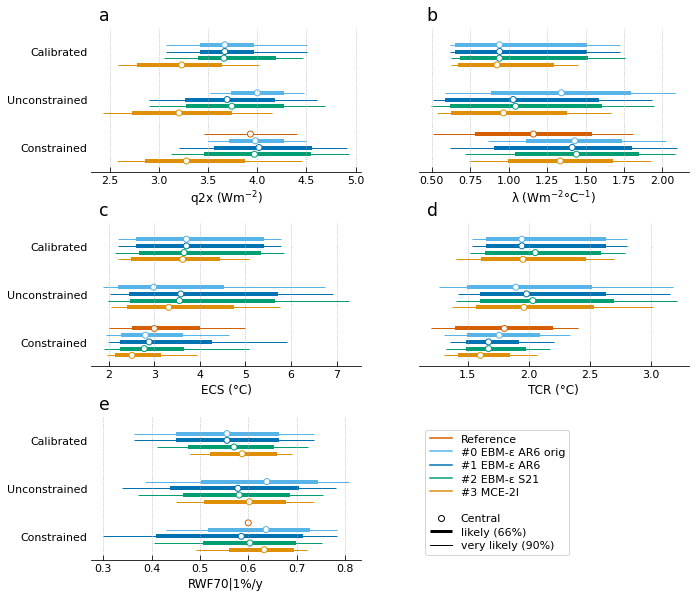

In [19]:
width = 1.5 * 2.5
height = 2.

parm_order = ['q2x', 'lamg', 'ecs', 'tcr', 'tcr/ecs']
map_name_unit = {
    'q2x': ('q2x', 'Wm$^{−2}$'),
    'lamg': ('λ', 'Wm$^{−2}$°C$^{−1}$'),
    'ecs': ('ECS', '°C'),
    'tcr': ('TCR', '°C'),
    'tcr/ecs': ('RWF70|1%/y', ''),
}
group_order = ['Calibrated', 'Unconstrained', 'Constrained']
member_order = ['Reference'] + [
    map_method[k]
    for k in ['ar6_orig', 'ar6', 's21', 'mce-2l']
]

plt.init_regular(5, col=2, kw_space={'height': height, 'aspect': width/height})

plt.plot_quantile_range(
    dfq,
    axes=plt(),
    parm_order=parm_order,
    map_name_unit=map_name_unit,
    group_order=group_order,
    member_order=member_order,
    map_color=map_color,
    kw_legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0.55, 0.),
        'labelspacing': 0.3,
    }
)

for i, ax in enumerate(plt()):
    if i % 2 == 1:
        ax.tick_params(axis='y', labelleft=False)

plt.panel_label()
plt.savefig('./image/range_parms_selected.png')

## 2-D density plot: q2x vs lamg

In [20]:
name_x = 'lamg'
name_y = 'q2x'
map_lim = {
    'lamg': (0.2, 2.4),
    'q2x': (2.0, 5.4),
}

prob_ref = np.array([0.90, 0.66])
label_ref = '{:}%, {:}%'.format(*[int(p1*100) for p1 in prob_ref])

contour_order = ['Unconstrained', 'Constrained']

handles = [
    mpl.lines.Line2D([0], [0], ls='None', marker='o', mfc='w', mec='k'),
    mpl.patches.Patch(alpha=0, linewidth=0),
] + [
    mpl.lines.Line2D([0, 1], [0, 0], color=f'C{i}')
    for i in range(len(contour_order))
]
labels = [
    'Calibrated',
    '',
] + [
    '{} {}'.format(sample, label_ref)
    for sample in contour_order
]

[2024-07-10 09:41:40 mce] INFO:saved to ./image/dist_q2x-lamg.png


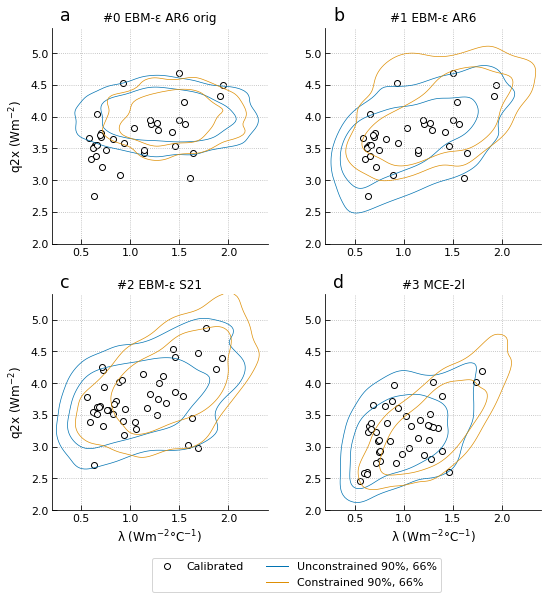

In [21]:
method_order = ['ar6_orig', 'ar6', 's21', 'mce-2l']

plt.init_regular(len(method_order), col=2, kw_space={'aspect': 1.})

# Unconstrained samples are reduced for plot
dfx = [
    df_parms_sample.iloc[:2000][[name_x, name_y]],
    df_parms_constrained[[name_x, name_y]],
]

for ax, method in zip(plt(), method_order):
    ax.scatter(
        df_parms_calib[(name_x, method)].values,
        df_parms_calib[(name_y, method)].values,
        c='w', edgecolors='k',
    )

    xlim = map_lim[name_x]
    ylim = map_lim[name_y]
    xp, yp = np.mgrid[xlim[0]:xlim[1]:100j, ylim[0]:ylim[1]:100j]
    positions = np.vstack([xp.ravel(), yp.ravel()])

    for i, df in enumerate(dfx):
        din = np.vstack([
            df[(name_x, method)].values,
            df[(name_y, method)].values,
        ])
        pdf = stats.gaussian_kde(din)
        zp = pdf(positions).reshape(xp.shape)
        levels = np.quantile(pdf(din), 1.-prob_ref)
        ax.contour(
            xp, yp, zp, levels, colors=f'C{i}', linewidths=0.7,
        )
    
    ax.set_title(map_method[method])
    ax.grid()

plt.figure.legend(
    handles, labels,
    ncol=2, loc='upper center',
    bbox_to_anchor=plt.get_fig_position_relto_axes((0.5, -0.0867)),
)

for i, ax in enumerate(plt()):
    if i > 1:
        ax.set_xlabel('{} ({})'.format(*map_name_unit[name_x]))
    if i % 2 == 0:
        ax.set_ylabel('{} ({})'.format(*map_name_unit[name_y]))

plt.panel_label()

plt.savefig(f'./image/dist_{name_y}-{name_x}.png')